In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./LLM_Analysis.xlsx',sheet_name='Liner Reg Data')
results = df[['ARC','HELLASWAG','MMLU','TRUTHFULQA']]

In [3]:
df.columns

Index(['Param-Log10', 'Formula', 'No_spectrable_Matrices',
       'Encoder/decoder Blocks', 'Alpha_mean', 'Spectral_Norm_Max',
       'log_spectral_norm_max', 'Spectral_Norm_Min', 'Max_Spectral_Range',
       'Spectral_Range_out', 'SN_MAX', 'SN_MIN', 'SN_range', 'SN_MEDIAN',
       'SN_Range_Log', 'SN_MEDIAN_LOG', 'SR_MEDIAN', 'LOG_SR_MEDIAN',
       'Std_Rng_spec', 'Avg_Cond_Num', 'STD_Cond_Num',
       'RangeCorr_Alpha_Reprted', 'ECN_MAX', 'ECN_MIN', 'ECN_AVG', 'ECN_RANGE',
       'ECN_STD', 'ECN_MEDIAN', 'ER_MAX', 'ER_MIN', 'ER_RANGE', 'ER_AVG',
       'ER_STD', 'ER_MEDIAN', '1/ER_AVG', '1/ER_MED', '1/ER_MIN', '1/ER_MAX',
       'LOG_ECN_MAX', 'LOG_ECN_MIN', 'LOG_ECN_AVG', 'LOG_ECN_RANGE',
       'LOG_ECN_STD', 'LOG_ECN_MEDIAN', 'LOG_MAX_SPECTRAL_RANGE', 'CN_MEDIAN',
       'ARC', 'HELLASWAG', 'MMLU', 'TRUTHFULQA', 'PCT', 'Rank'],
      dtype='object')

# Using diff as distance

In [4]:
array1 = df['ECN_MAX'].to_numpy()
array2 = results['ARC'].to_numpy()

In [5]:
# Generate all possible pairs and calculate differences for array1
pairs1 = list(combinations(array1, 2))
diffs1 = np.array([pair[1] - pair[0] for pair in pairs1])

# Generate all possible pairs and calculate differences for array2
pairs2 = list(combinations(array2, 2))
diffs2 = np.array([pair[1] - pair[0] for pair in pairs2])

### Corr

In [6]:
from scipy.stats import spearmanr, kendalltau, linregress
from scipy.spatial.distance import euclidean, cityblock
from scipy.spatial.distance import minkowski, chebyshev

C:\Users\iq\AppData\Local\Temp\ipykernel_36516\3474307642.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(rect=[0.1, 0.00, 1, 0.01])


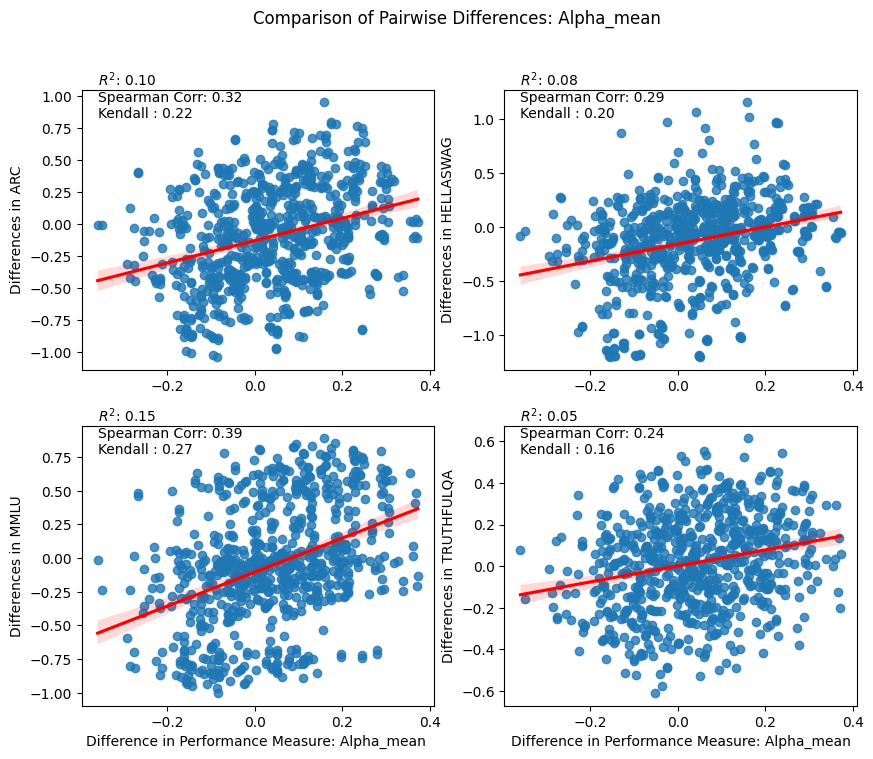

In [7]:
x_var = 'Param-Log10'
x_var= '1/ER_MED'
# x_var = 'formula'
x_var = 'Alpha_mean'
array1 = np.log(df[x_var].to_numpy())

# Generate all possible pairs and calculate differences for array1
pairs1 = list(combinations(array1, 2))
diffs1 = np.array([(pair[1] - pair[0]) for pair in pairs1])

#ploting

fig, axes = plt.subplots(nrows=2, ncols =2 , figsize=(10,8))
fig.tight_layout(rect=[0.1, 0.00, 1, 0.01])
axes = axes.flat

for idx, name in enumerate(results.columns):
    array2 = np.log(results[name].to_numpy())
    pairs2 = list(combinations(array2, 2))
    diffs2 = np.array([(pair[1] - pair[0]) for pair in pairs2])
    
    slope, intercept, r_value, _, _ = linregress(diffs1, diffs2)
    corr, _ = spearmanr(diffs1, diffs2)
    kendall_corr, _ = kendalltau(diffs1, diffs2)
    r_squared = r_value**2
    
    sns.regplot(x=diffs1, y=diffs2, line_kws={'color': 'red'}, ax=axes[idx])
    axes[idx].set_ylabel(f'Differences in {name}')
    y_position = max(diffs2) - 0.06  * (max(diffs2) - min(diffs2))
    axes[idx].text(min(diffs1) + 0.0 * (max(diffs1) - min(diffs1)), y_position, 
                   f'$R^2$: {r_squared:.2f}\nSpearman Corr: {corr:.2f} \nKendall : {kendall_corr:.2f}')
    
axes[2].set_xlabel(f'Difference in Performance Measure: {x_var} ',fontsize=10) 
axes[3].set_xlabel(f'Difference in Performance Measure: {x_var}',fontsize=10)     
    
plt.suptitle(f'Comparison of Pairwise Differences: {x_var}')
plt.show()

C:\Users\iq\AppData\Local\Temp\ipykernel_36516\4208122178.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(rect=[0.1, 0.00, 1, 0.01])


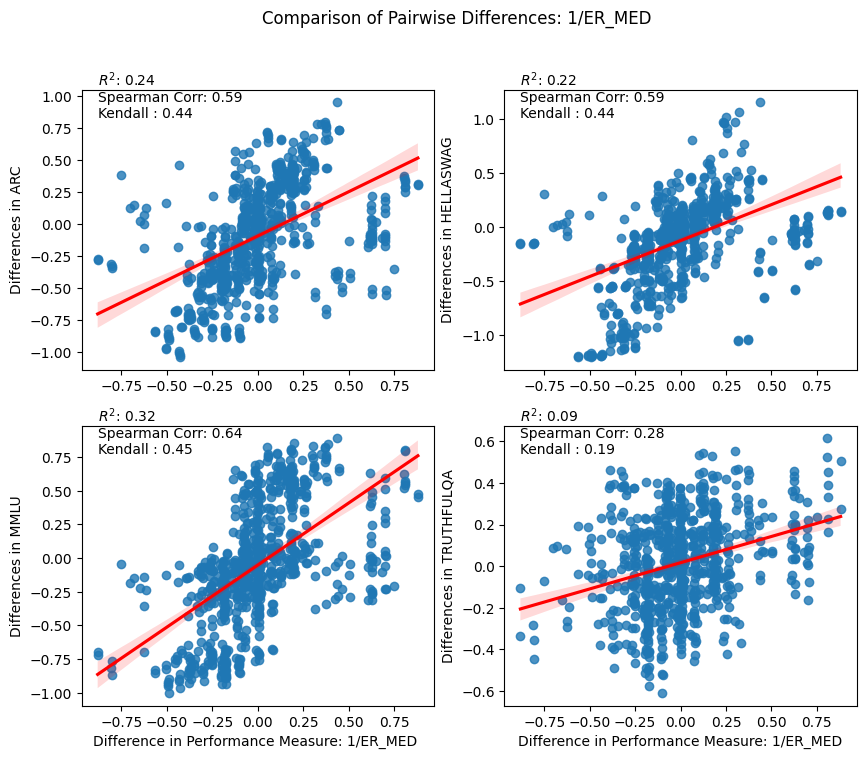

In [8]:
x_var = 'Param-Log10'
x_var= '1/ER_MED'

array1 = np.log(df[x_var].to_numpy())

# Generate all possible pairs and calculate differences for array1
pairs1 = list(combinations(array1, 2))
diffs1 = np.array([(pair[1] - pair[0]) for pair in pairs1])

#ploting

fig, axes = plt.subplots(nrows=2, ncols =2 , figsize=(10,8))
fig.tight_layout(rect=[0.1, 0.00, 1, 0.01])
axes = axes.flat

for idx, name in enumerate(results.columns):
    array2 = np.log(results[name].to_numpy())
    pairs2 = list(combinations(array2, 2))
    diffs2 = np.array([(pair[1] - pair[0]) for pair in pairs2])
    
    slope, intercept, r_value, _, _ = linregress(diffs1, diffs2)
    corr, _ = spearmanr(diffs1, diffs2)
    kendall_corr, _ = kendalltau(diffs1, diffs2)
    r_squared = r_value**2
    
    sns.regplot(x=diffs1, y=diffs2, line_kws={'color': 'red'}, ax=axes[idx])
    axes[idx].set_ylabel(f'Differences in {name}')
    y_position = max(diffs2) - 0.06  * (max(diffs2) - min(diffs2))
    axes[idx].text(min(diffs1) + 0.0 * (max(diffs1) - min(diffs1)), y_position, 
                   f'$R^2$: {r_squared:.2f}\nSpearman Corr: {corr:.2f} \nKendall : {kendall_corr:.2f}')
    
axes[2].set_xlabel(f'Difference in Performance Measure: {x_var} ',fontsize=10) 
axes[3].set_xlabel(f'Difference in Performance Measure: {x_var}',fontsize=10)     
    
plt.suptitle(f'Comparison of Pairwise Differences: {x_var}')
plt.show()